# Word clouds from NYT comments dataset

The [dataset here](https://www.kaggle.com/aashita/nyt-comments) comprises of comments made on articles in New York Times in Jan-April 2018 and Jan-May 2017. To get a glimpse of the textual features in the data, we plot the most frequent words using word clouds. 

First we import modules and data. The functions `WordCloud`, `STOPWORDS`, `ImageColorGenerator` from the module `wordcloud` and the function `Image` from the module `PIL` are imported.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings('ignore')

c1 = pd.read_csv('../input/nyt-comments/CommentsJan2017.csv')
c2 = pd.read_csv('../input/nyt-comments/CommentsFeb2017.csv')
c3 = pd.read_csv('../input/nyt-comments/CommentsMarch2017.csv')
c4 = pd.read_csv('../input/nyt-comments/CommentsApril2017.csv')
c5 = pd.read_csv('../input/nyt-comments/CommentsMay2017.csv')
c6 = pd.read_csv('../input/nyt-comments/CommentsJan2018.csv')
c7 = pd.read_csv('../input/nyt-comments/CommentsFeb2018.csv')
c8 = pd.read_csv('../input/nyt-comments/CommentsMarch2018.csv')
c9 = pd.read_csv('../input/nyt-comments/CommentsApril2018.csv')
comments = pd.concat([c1, c2, c3, c4, c5, c6, c7, c8, c9])
comments.drop_duplicates(subset='commentID', inplace=True)

a1 = pd.read_csv('../input/nyt-comments/ArticlesJan2017.csv')
a2 = pd.read_csv('../input/nyt-comments/ArticlesFeb2017.csv')
a3 = pd.read_csv('../input/nyt-comments/ArticlesMarch2017.csv')
a4 = pd.read_csv('../input/nyt-comments/ArticlesApril2017.csv')
a5 = pd.read_csv('../input/nyt-comments/ArticlesMay2017.csv')
a6 = pd.read_csv('../input/nyt-comments/ArticlesJan2018.csv')
a7 = pd.read_csv('../input/nyt-comments/ArticlesFeb2018.csv')
a8 = pd.read_csv('../input/nyt-comments/ArticlesMarch2018.csv')
a9 = pd.read_csv('../input/nyt-comments/ArticlesApril2018.csv')
articles = pd.concat([a1, a2, a3, a4, a5, a6, a7, a8, a9])
articles.drop_duplicates(subset='articleID', inplace=True)

In [3]:
comments.shape

(2118617, 34)

There are over 2 million comments in total with 34 features. 

In [4]:
comments.head(2)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455908,N. Smith,64679318.0,New York City,NaN,NaN
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN


In [5]:
articles.shape

(9298, 16)

In [6]:
articles.head(2)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58691a5795d0e039260788b9,1324,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...
1,NaN,586967bf95d0e03926078915,2836,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...


There are over 9,000 articles in total with 16 features. 

## Word Clouds
We define a function that generates the word clouds of custom shapes. Here, the argument `mask` is used to pass on images of high definitions that are used in the generation of word clouds. The images used below are stored in the Kaggle dataset [Masks for word clouds](https://www.kaggle.com/aashita/masks).

In [7]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '../input/masks/masks-wordclouds/'

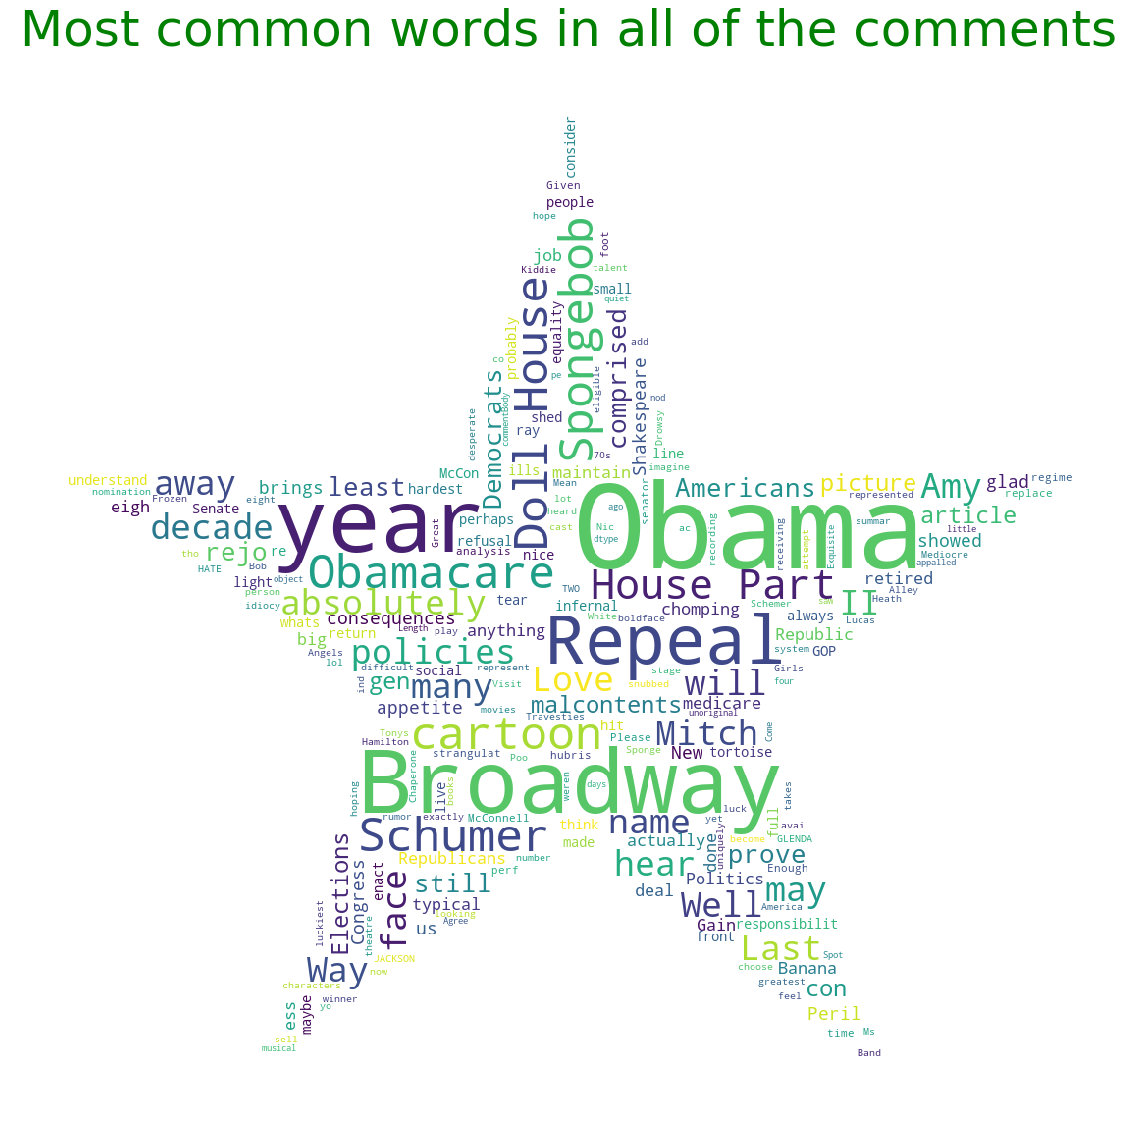

In [8]:
comments_text = str(comments.commentBody)
comments_mask = np.array(Image.open(d + 'star.png'))
plot_wordcloud(comments_text, comments_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the comments', title_size=50)

In [9]:
comments.head(2)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455908,N. Smith,64679318.0,New York City,NaN,NaN
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN


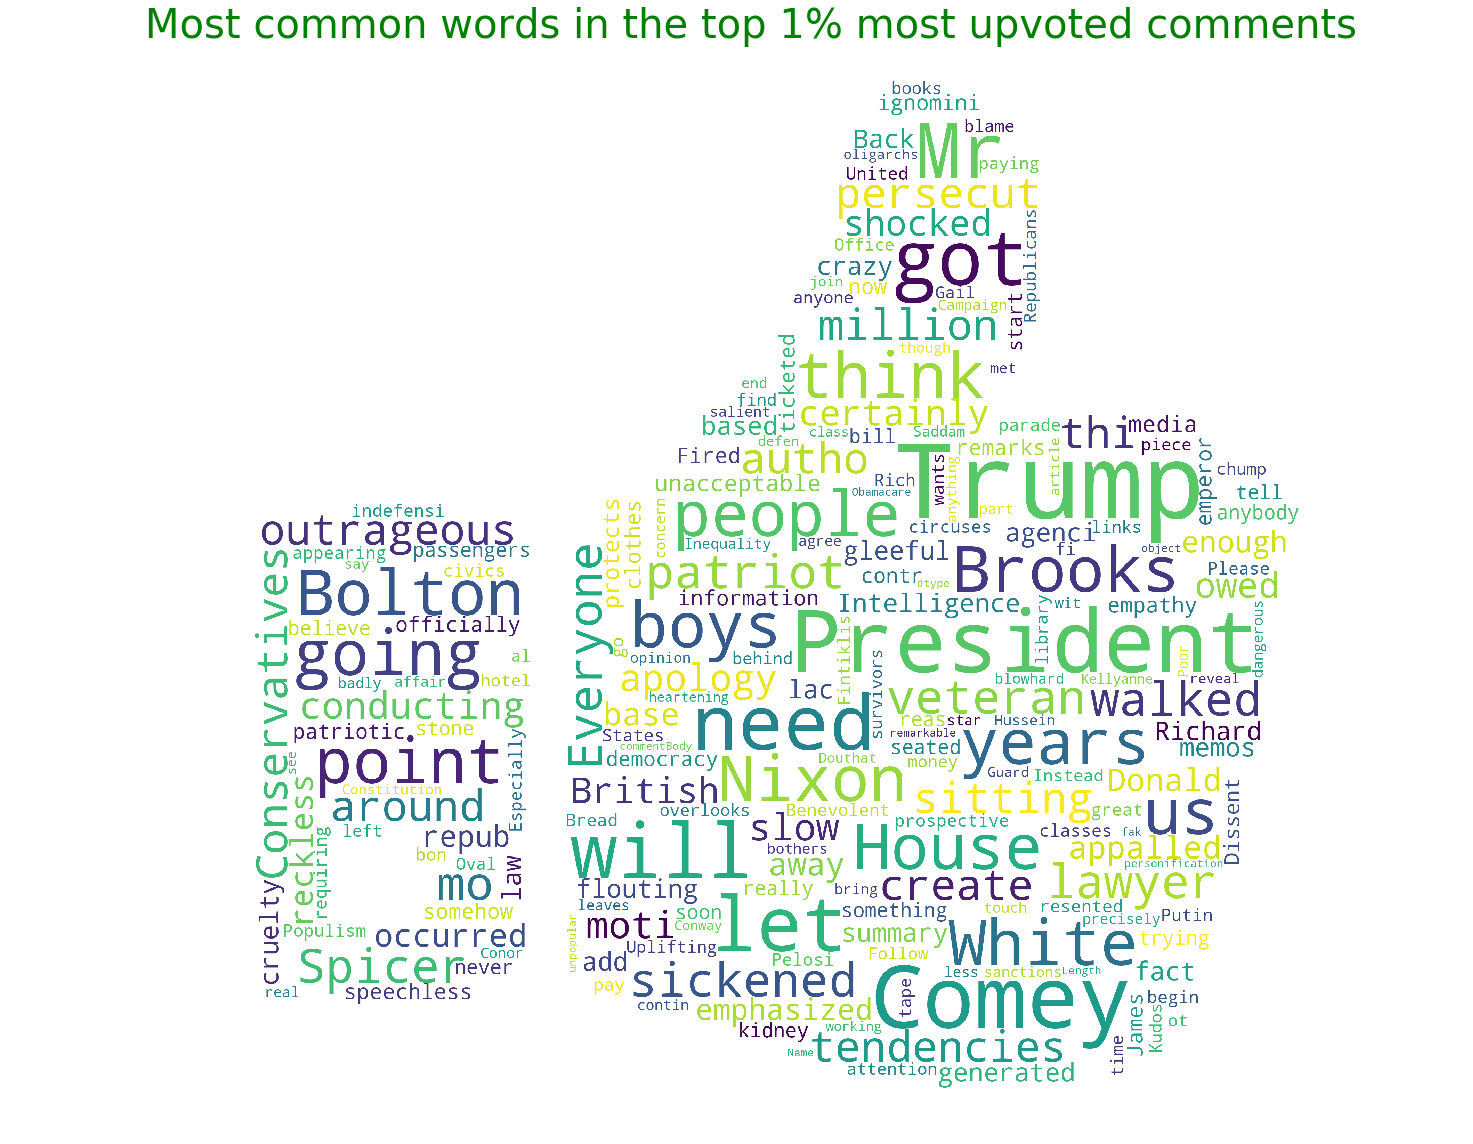

In [10]:
n = round(comments.shape[0]*0.01)
top_recommended_comments_text = str(comments.nlargest(n, columns='recommendations').commentBody)
upvote_mask = np.array(Image.open(d + 'upvote.png'))
plot_wordcloud(top_recommended_comments_text, upvote_mask, max_words=300000, max_font_size=300,
               title = 'Most common words in the top 1% most upvoted comments')

In [11]:
comments.head(2)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455908,N. Smith,64679318.0,New York City,NaN,NaN
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN


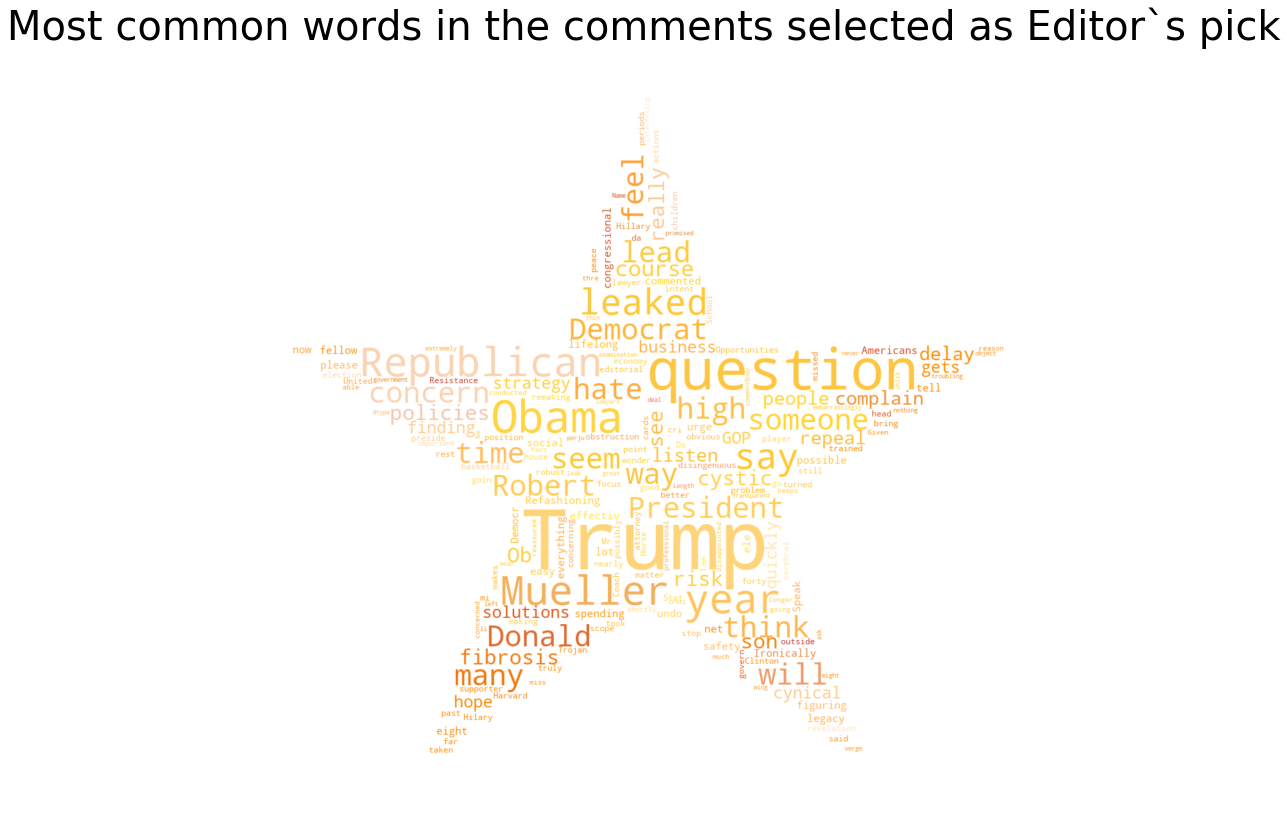

In [12]:
editorsPick_comments_text = str(comments.loc[comments.editorsSelection==1, 'commentBody'])
star_mask = np.array(Image.open(d + 'star.png'))
plot_wordcloud(editorsPick_comments_text, star_mask, max_words=8000, max_font_size=120, figure_size=(16,14),
               title = 'Most common words in the comments selected as Editor`s pick', image_color=True)

In [13]:
comments.head(2)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455908,N. Smith,64679318.0,New York City,NaN,NaN
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,News,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN


In [14]:
len(str(comments.userDisplayName)*800)

1506400

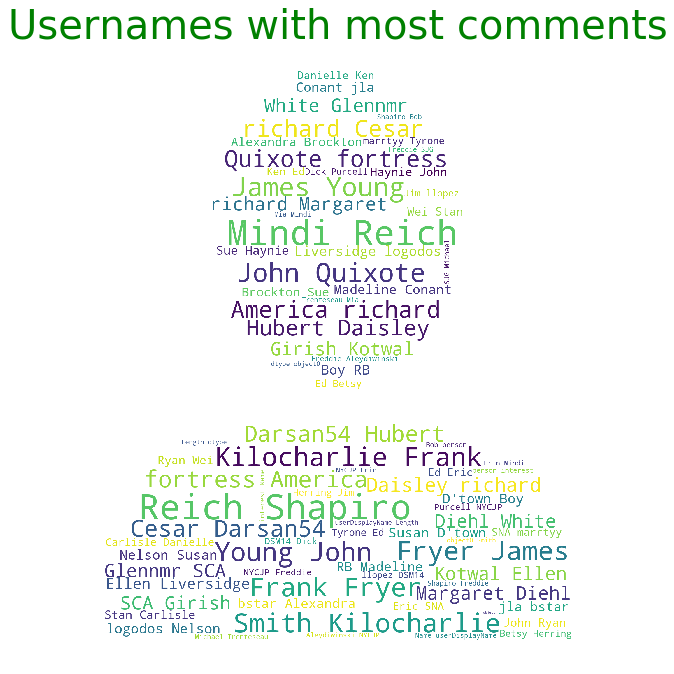

In [15]:
userDisplayNames = str(comments.userDisplayName)*800
user_mask = np.array(Image.open(d + 'user.png'))
plot_wordcloud(userDisplayNames, user_mask, max_words=1200, max_font_size=120, figure_size=(10,12), title = 'Usernames with most comments')

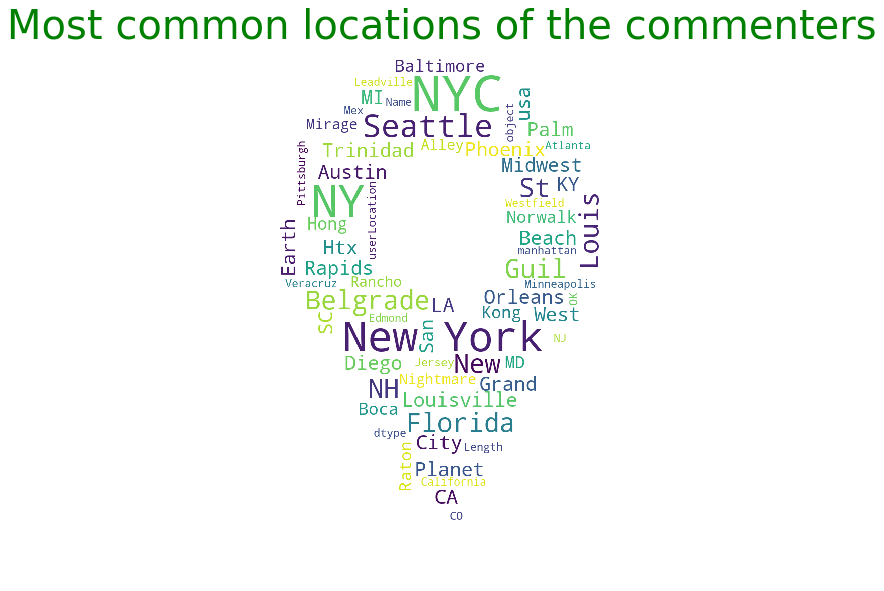

In [16]:
userLocations = str(comments.userLocation)#*5
loc_mask = np.array(Image.open(d + 'loc.png'))
plot_wordcloud(userLocations, loc_mask, max_words=800, max_font_size=100, figure_size=(11,16),
               title = 'Most common locations of the commenters')

In [17]:
articles.head(2)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58691a5795d0e039260788b9,1324,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...
1,NaN,586967bf95d0e03926078915,2836,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...


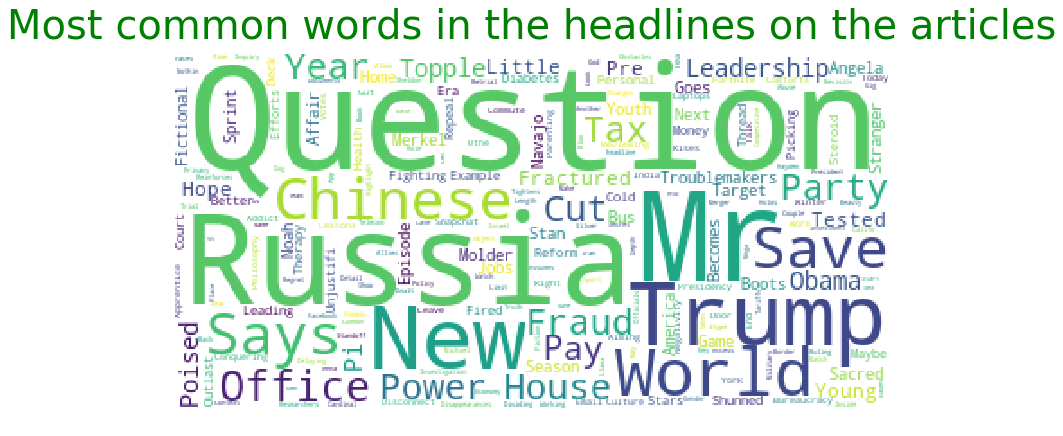

In [18]:
headlines = str(articles.headline)
plot_wordcloud(headlines, max_words=800, max_font_size=80, figure_size=(14,10),
               title = 'Most common words in the headlines on the articles')

References for the word clouds:
* https://www.kaggle.com/adiljadoon/word-cloud-with-python
* https://github.com/amueller/word_cloud
* http://minimaxir.com/2016/05/wordclouds/
* http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html
*  https://medium.com/@dudsdu/an-example-of-word-cloud-with-mask-4cbbd699fb14